In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata 

In [4]:
def norm(text):
  value = unicodedata.normalize("NFKD",text).encode('ASCII', 'ignore').decode('ASCII')
  return value.capitalize()

In [22]:
data = pd.read_excel("dataset.xlsx")
data = data.drop_duplicates()
correlation = data.corr()

In [23]:
data = data.drop(columns=['LATITUDE', 'LONGITUDE'])
data = data.applymap(lambda s: norm(s) if type(s) == str else s)
data = data.applymap(lambda s: s.lower() if type(s) == str else s)
data = data.loc[data['MUNICIPIO_CIRCUNSCRICAO'] == 'sao paulo']

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LOGRADOURO,NUMERO_LOGRADOURO,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
3,decap,8a sec,sao paulo,049 dp - sao mateus,1,1,20249,4,2015,2015-04-25 00:40:09,...,rua tamotsu yabuta,0.0,vitima,feminino,17,1997-12-31,branca,estudante,homicidio doloso,feminicidio-contra a mulher por razoes da cond...
6,decap,8a sec,sao paulo,055 dp - parque sao rafael,1,1,200100,5,2015,2015-05-16 19:57:57,...,da vedacao da divulgacao dos dados relativos,NaN,vitima,feminino,30,1984-09-07,parda,atendente,homicidio doloso,feminicidio-contra a mulher por razoes da cond...
34,decap,7a sec,sao paulo,032 dp - itaquera,1,1,10326,11,2015,2015-11-28 17:07:48,...,da vedacao da divulgacao dos dados relativos,NaN,vitima,feminino,30,1984-12-06,branca,operador(a) telemarketing,homicidio doloso,feminicidio-contra a mulher por razoes da cond...
35,decap,2a sec,sao paulo,095 dp - heliopolis,1,1,10358,11,2015,2015-11-04 12:15:35,...,da vedacao da divulgacao dos dados relativos,NaN,vitima,feminino,30,1985-04-24,branca,corretor(a) de imoveis,homicidio doloso,feminicidio-contra a mulher por razoes da cond...
39,decap,6a sec,sao paulo,047 dp - capao redondo,1,1,10247,12,2015,2015-12-21 12:57:28,...,da vedacao da divulgacao dos dados relativos,NaN,vitima,feminino,34,1981-02-16,parda,secretario(a),homicidio doloso,feminicidio-contra a mulher por razoes da cond...
40,decap,4a sec,sao paulo,045 dp - vila brasilandia,1,1,200100,12,2015,2015-12-21 00:53:24,...,da vedacao da divulgacao dos dados relativos,NaN,vitima,feminino,38,1977-06-22,branca,empregado domestico,homicidio doloso,feminicidio-contra a mulher por razoes da cond...


<Axes: xlabel='LOGRADOURO', ylabel='Count'>

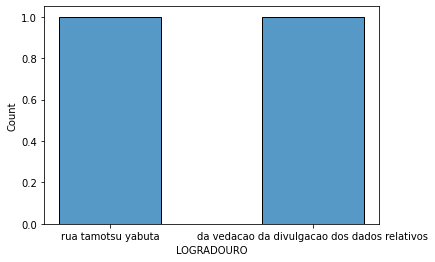

In [47]:
Lista = pd.DataFrame() 
Lista['LOGRADOURO'] = data['LOGRADOURO']
Lista['Freq'] = data.groupby('LOGRADOURO')['LOGRADOURO'].transform('count')
Lista = Lista.drop_duplicates()
sns.histplot(data=Lista, x="LOGRADOURO", discrete=True, shrink=0.5)


